In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
%matplotlib inline
import seaborn as sns

################ USER FUNCTION ################
import user_functions as uf
###############################################
rc("font", family="AppleGothic")
rcParams["font.family"] = "AppleGothic"
plt.rc("font", family="AppleGothic")

In [43]:
# load
datasets = pd.read_csv("../pre_data/[no_up]train_datasets(no_encod).csv", index_col=0)
# datasets.loc[:, "TARGET"] = \
#     datasets["TARGET"].apply(lambda x: "연체" if x == 1 else "우량")

In [253]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303844 entries, 0 to 303843
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   303844 non-null  int64  
 1   NAME_CONTRACT_TYPE           303844 non-null  object 
 2   CODE_GENDER                  303844 non-null  object 
 3   FLAG_OWN_CAR                 303844 non-null  object 
 4   FLAG_OWN_REALTY              303844 non-null  object 
 5   CNT_CHILDREN                 303844 non-null  int64  
 6   AMT_INCOME_TOTAL             303844 non-null  float64
 7   AMT_CREDIT                   303844 non-null  float64
 8   AMT_ANNUITY                  303844 non-null  float64
 9   AMT_GOODS_PRICE              303844 non-null  float64
 10  NAME_TYPE_SUITE              303844 non-null  object 
 11  NAME_INCOME_TYPE             303844 non-null  object 
 12  NAME_EDUCATION_TYPE          303844 non-null  object 
 13 

In [51]:
pre_app_ds = \
    datasets[["승인/거부(prev_app)", "(추정)이자율", "연체일", "연체횟수", "승인액/요청액", "TARGET"]]

In [33]:
# POS_CASH: Point of sales loan(소비재 구매 시 할부 대출) 관련 자료
pos_cash_ds = datasets[["소액연체비중(pos_cash)", "연체기간(pos_cash)", "TARGET"]]

In [ ]:
pc_micro_de_1 = \
    pos_cash_ds.loc[pos_cash_ds["TARGET"] == 1, ["소액연체비중(pos_cash)"]]
pc_micro_de_0 = \
    pos_cash_ds.loc[pos_cash_ds["TARGET"] == 0, ["소액연체비중(pos_cash)"]]

In [52]:
pre_app_ds

,승인/거부(prev_app),(추정)이자율,연체일,연체횟수,승인액/요청액,TARGET
0,1.0,0.230477,0.0,0.0,1.000000,1.0
1,2.0,0.381257,0.0,0.0,1.011007,0.0
2,1.0,0.315846,0.0,0.0,0.828021,0.0
3,2.0,0.553993,0.0,0.0,0.849955,0.0
4,2.0,0.755931,0.0,0.0,0.919950,0.0
...,...,...,...,...,...,...
303839,1.0,0.816860,0.0,0.0,1.000000,0.0
303840,1.0,0.218748,0.0,0.0,0.986561,0.0
303841,2.0,0.765959,0.0,0.0,0.831397,0.0
303842,2.0,0.797477,0.0,0.0,1.122050,1.0


In [213]:
# temp = datasets[["DAYS_EMPLOYED", "TARGET"]].copy()
# temp["DAYS_EMPLOYED"] = temp["DAYS_EMPLOYED"].apply(lambda x: (x / -365) if x < 0 else 0)
# temp_1 = temp.loc[temp["TARGET"] == 1, ["DAYS_EMPLOYED"]]
# temp_0 = temp.loc[temp["TARGET"] == 0, ["DAYS_EMPLOYED"]]

# plt.figure(figsize=(15, 10))
# sns.set_theme(style="ticks",
#               font="AppleGothic", 
#               rc={"axes.unicode_minus":False}
#              )
# sns.kdeplot(data=temp_1, 
#             x="DAYS_EMPLOYED", 
#             label="연체 O", 
#             shade=True, # 하단 밀도 표시 여부
#             color="darkred", # 색
#             bw=0.02, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
#             )
# sns.kdeplot(data=temp_0, 
#             x="DAYS_EMPLOYED", 
#             label="연체 X", 
#             color="darkblue", # 색
#             shade=True,
#             bw=0.02, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
#             )

# plt.xlim(0, 20)
# plt.legend()
# # plt.xlabel("", fontsize=13)
# plt.ylabel("비중", fontsize=13)

# plt.title("")

<ipython-input-264-dfd97ac82907>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1_ds[feature] = temp1_ds[feature].str.slice(start=0, stop=10)


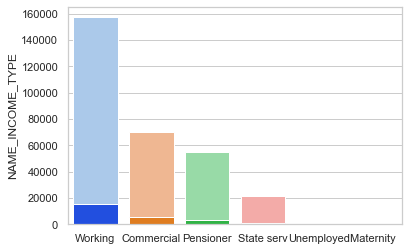

In [264]:
def bar_plot(datasets, feature, max_value=6):
    # label font size setting
    parameters = {"axes.labelsize": 12,
                "axes.titlesize": 12} # 안 됨
    plt.rcParams.update(parameters)

    # 테마 설정
    sns.set_theme(style="whitegrid")

    # 기본 데이터 설정
    temp1_ds = datasets[["TARGET", feature]]
    # 글자 수 10개로 제한
    temp1_ds[feature] = temp1_ds[feature].str.slice(start=0, stop=10)
    temp2_ds = temp1_ds.loc[temp1_ds["TARGET"] == 1]

    # 전체 데이터 개수 표시
    sns.barplot(y=temp1_ds.iloc[:, 1].value_counts()[:max_value],
                x=temp1_ds.iloc[:, 1].value_counts()[:max_value].index,
                palette="pastel"
                )

    # TARGET == 1인 것만 표시
    sns.barplot(y=temp2_ds.iloc[:, 1].value_counts()[:max_value],
                x=temp2_ds.iloc[:, 1].value_counts()[:max_value].index,
                palette="bright"
            )

    plt.show()

    return None

bar_plot(datasets, "NAME_INCOME_TYPE")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

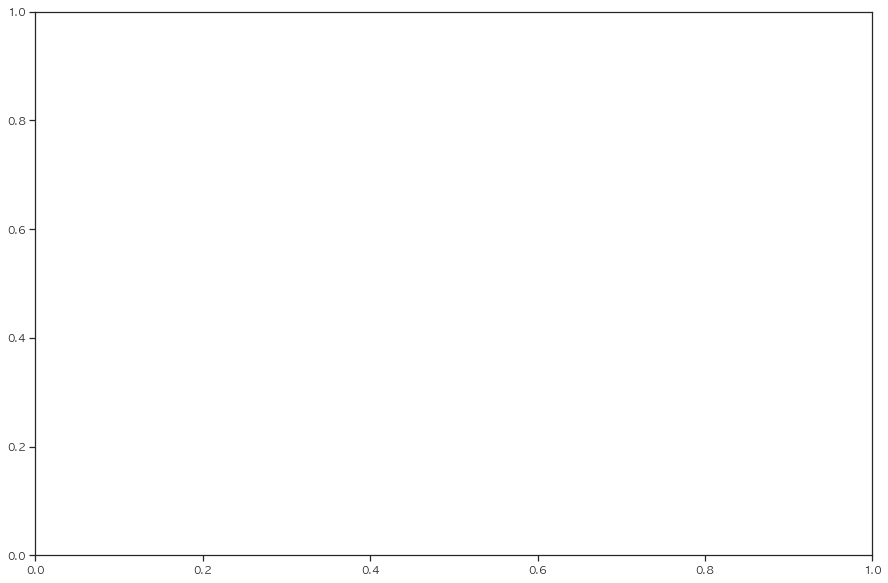

In [258]:
temp_1 = temp.loc[temp["TARGET"] == 1, ["과거_상환액/총액"]]
temp_0 = temp.loc[temp["TARGET"] == 0, ["과거_상환액/총액"]]
plt.figure(figsize=(15, 10))
sns.set_theme(style="ticks",
              font="AppleGothic", 
              rc={"axes.unicode_minus":False}
             )
sns.kdeplot(data=temp_1, 
            x="과거_상환액/총액", 
            label="연체 O", 
            shade=True, # 하단 밀도 표시 여부
            color="darkred", # 색
            bw=0.2, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
            )
sns.kdeplot(data=temp_0, 
            x="과거_상환액/총액", 
            label="연체 X", 
            color="darkblue", # 색
            shade=True,
            bw=0.2, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
            )

plt.xlim(0.8, 1.1)
plt.legend()
# plt.xlabel("", fontsize=13)
plt.ylabel("비중", fontsize=13)

plt.title("")

# https://www.javaer101.com/article/1244868.html

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '')

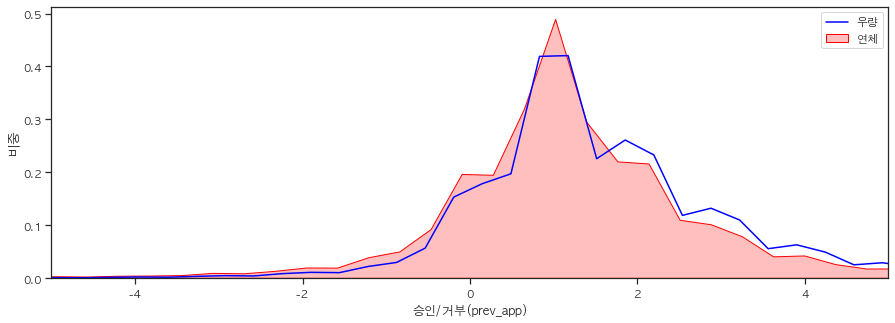

In [131]:
temp_1 = pre_app_ds.loc[pre_app_ds["TARGET"] == 1, ["승인/거부(prev_app)"]]
temp_0 = pre_app_ds.loc[pre_app_ds["TARGET"] == 0, ["승인/거부(prev_app)"]]
plt.figure(figsize=(15, 5))
sns.set_theme(style="ticks",
              font="AppleGothic", 
              rc={"axes.unicode_minus":False}
             )
sns.kdeplot(data=temp_1, 
            x="승인/거부(prev_app)", 
            label="연체", 
            shade=True, # 하단 밀도 표시 여부
            color="red", # 색
            bw=0.2, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
            )
sns.kdeplot(data=temp_0, 
            x="승인/거부(prev_app)", 
            label="우량", 
            color="blue", # 색
            bw=0.2, # histogram에서 선을 연결할 때 얼마나 완만하게 그릴지
            )

plt.xlim(-5, 5)
plt.legend()
# plt.xlabel("", fontsize=13)
plt.ylabel("비중", fontsize=13)

plt.title("")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '')

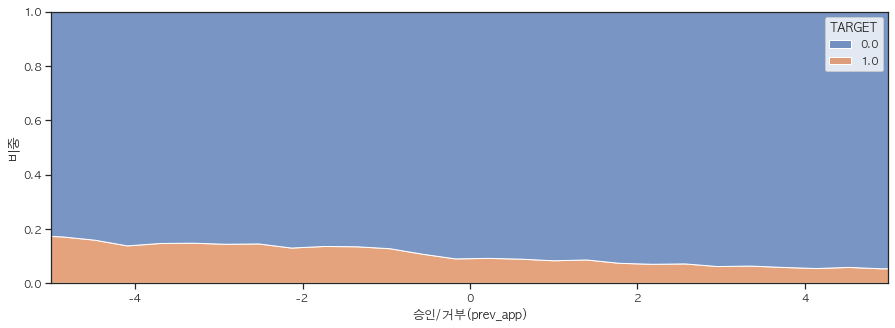

In [144]:
plt.figure(figsize=(15, 5))
sns.set_theme(style="ticks",
              font="AppleGothic", 
              rc={"axes.unicode_minus":False}
             )
sns.kdeplot(data=pre_app_ds[["승인/거부(prev_app)", "TARGET"]], x="승인/거부(prev_app)", hue="TARGET", multiple="fill", bw=0.2)
plt.xlim(-5, 5)
# plt.legend()
# plt.xlabel("", fontsize=13)
plt.ylabel("비중", fontsize=13)

plt.title("")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '')

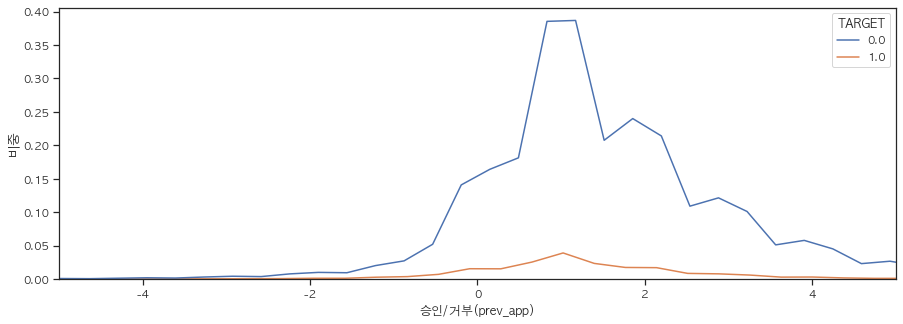

In [142]:
plt.figure(figsize=(15, 5))
sns.set_theme(style="ticks",
              font="AppleGothic", 
              rc={"axes.unicode_minus":False}
             )
sns.kdeplot(data=pre_app_ds[["승인/거부(prev_app)", "TARGET"]], x="승인/거부(prev_app)", hue="TARGET", bw=0.2)
plt.xlim(-5, 5)
# plt.legend()
# plt.xlabel("", fontsize=13)
plt.ylabel("비중", fontsize=13)

plt.title("")
